In [1]:
#import the libraries
import pandas as pd #for data processing
import numpy as np
import seaborn as sns #data visualization
import matplotlib.pyplot as plt


In [2]:
#from the data we can be able to understand the necessary measure to take on dealing with meningitis
#load the data set
mng_dataframe = pd.read_csv("/home/queen/Desktop/python/fproject/HdsnProject/dataset.csv")
mng_dataframe.head()#prints the first five rows of the datase by default.

,"WhiteCells(5-10,000)",Glucose(50-80),Neutrophiles(65),TotalProtein(15-45),lymphocytes(35),BMI,Intracranial Pressure(140),Age,Bacterial(1)
0,23000,40,72,10,5,46.5,174,50,1
1,15000,85,60,46,37,43.0,145,31,0
2,20000,45,67,25,13,45.1,150,32,1
3,13000,89,46,50,40,36.6,140,21,0
4,25000,38,70,30,10,43.1,160,33,1


In [4]:
#print out more information about the dataset
mng_dataframe.info()#give the extra details of the dataset, no of rows, columns etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WhiteCells(5-10,000)        768 non-null    int64  
 1   Glucose(50-80)              768 non-null    int64  
 2   Neutrophiles(65)            768 non-null    int64  
 3   TotalProtein(15-45)         768 non-null    int64  
 4   lymphocytes(35)             768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Intracranial Pressure(140)  768 non-null    object 
 7   Age                         768 non-null    int64  
 8   Bacterial(1)                768 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 54.1+ KB


In [5]:
#describe gives the statistical summary
mng_dataframe.describe()

,"WhiteCells(5-10,000)",Glucose(50-80),Neutrophiles(65),TotalProtein(15-45),lymphocytes(35),BMI,Age,Bacterial(1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,18293.367188,81.622396,60.067708,47.658854,38.243490,32.613151,33.240885,0.348958
std,4624.946742,38.268020,18.161397,23.109078,25.750824,7.876989,11.760232,0.476951
min,10001.000000,10.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,14083.250000,43.000000,48.000000,23.000000,10.000000,27.600000,24.000000,0.000000
50%,18995.000000,91.000000,60.000000,52.000000,43.000000,32.400000,29.000000,0.000000
75%,22225.000000,108.000000,72.000000,66.000000,58.000000,37.000000,41.000000,1.000000
max,29880.000000,197.000000,125.000000,99.000000,97.000000,67.100000,81.000000,1.000000


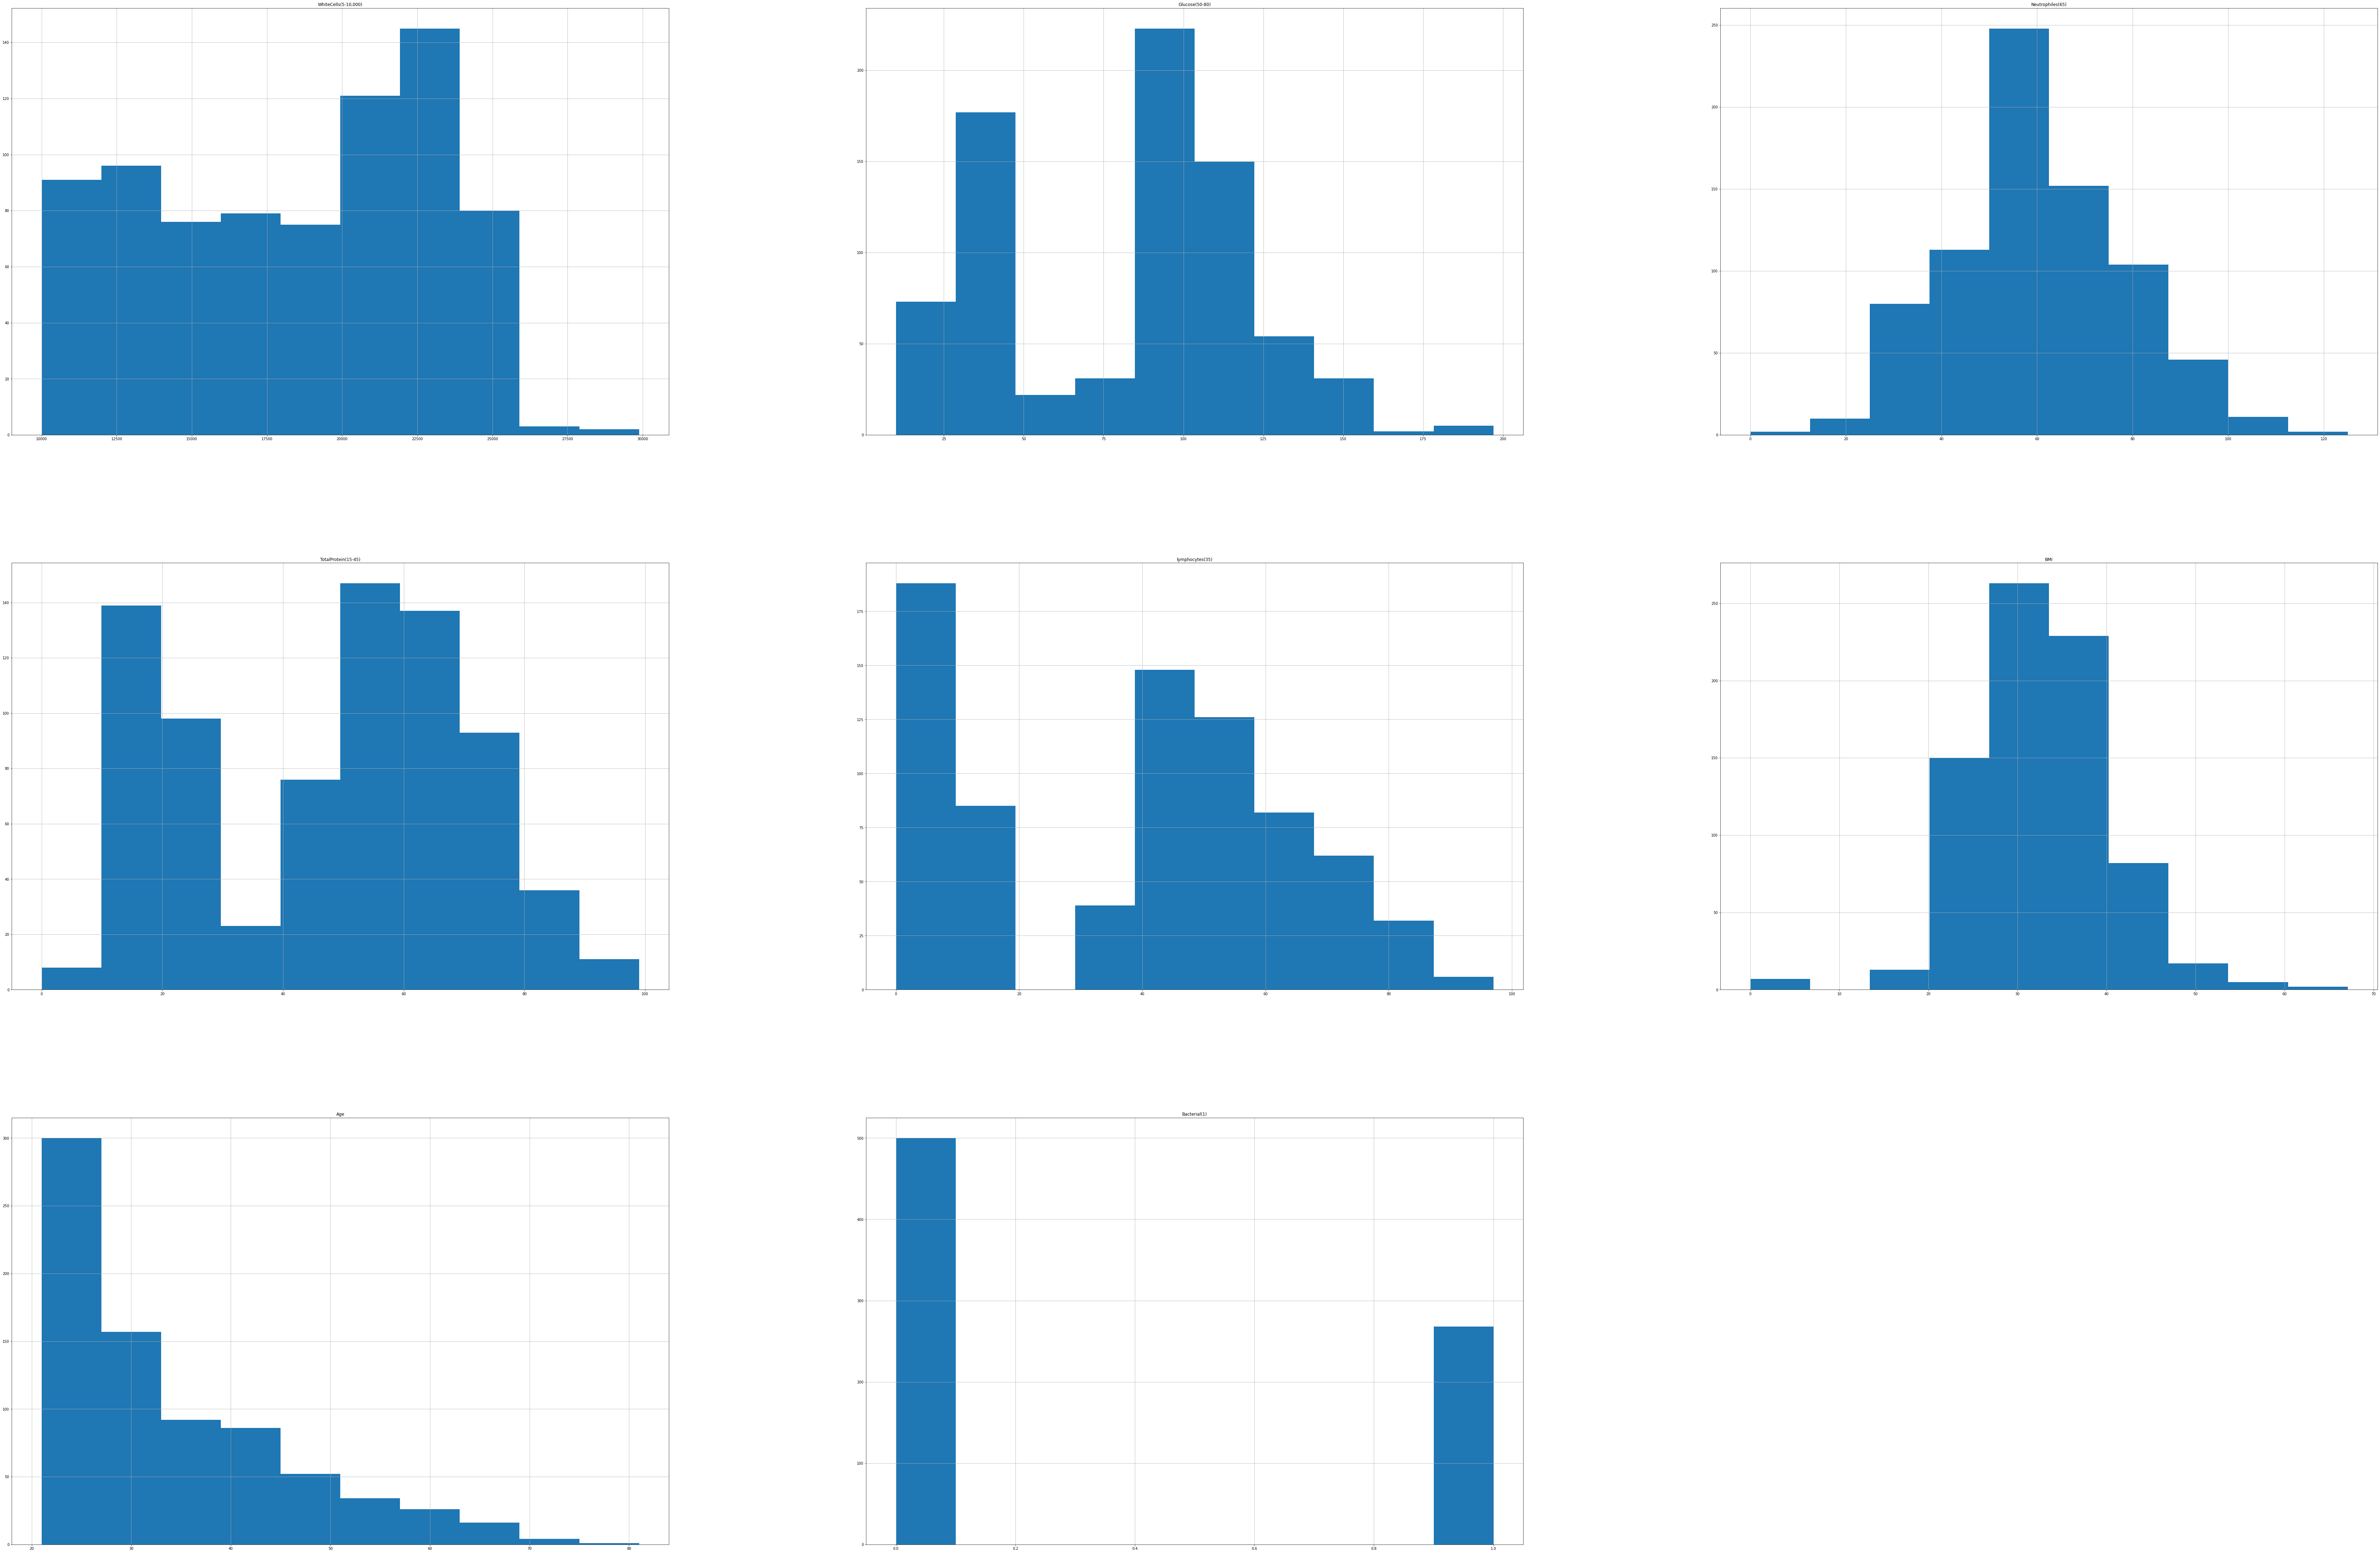

In [7]:
mng_dataframe.hist(figsize=(120,80))#shows visualization of each record
plt.show()

The oldest person to contract the disease is of age :  81


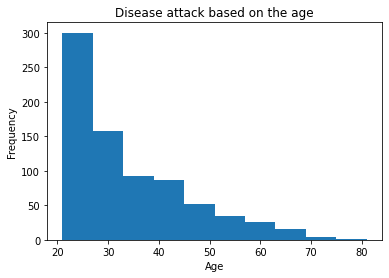

In [11]:
#visualization of the disease attack on age
#older people are not likely to get the disease 
#the young are more likely to get the disease
print("The oldest person to contract the disease is of age : ", mng_dataframe.Age.max())#checks for the oldest person to contract the disease
mng_dataframe.Age.plot.hist()
plt.xlabel('Age')
plt.title('Disease attack based on the age')
plt.show()

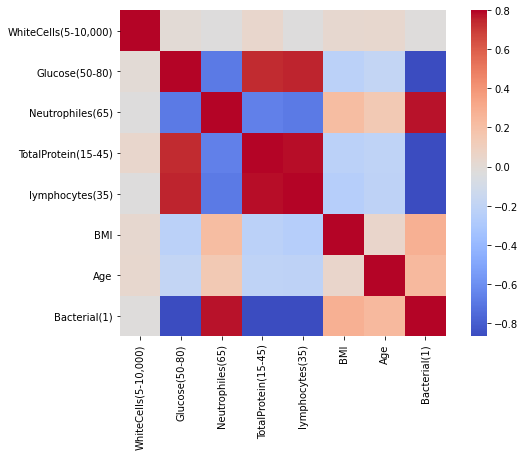

In [40]:
#check the correlation between the dataset variables
mng_dataframe.corr()
#correlation between variables has been represented in form of probabilities
#a heatmap can be used to show the correlation between the dataset
matrix = mng_dataframe.corr()
graph = plt.subplots(figsize=(9,6)),sns.heatmap(matrix, vmax=.8, square=True, cmap='coolwarm')

In [12]:
#import the model
from keras.models import Sequential #used for plain stack layers
from keras.layers import Dense 

In [35]:
#check the data types of the columns
#we have to work with integers
print(mng_dataframe.dtypes.sample(9))

print('\n\n')
#check for null values 
(mng_dataframe.isnull().sum())

Intracranial Pressure(140)     object
Neutrophiles(65)                int64
BMI                           float64
lymphocytes(35)                 int64
WhiteCells(5-10,000)            int64
Glucose(50-80)                  int64
Bacterial(1)                    int64
TotalProtein(15-45)             int64
Age                             int64
dtype: object





WhiteCells(5-10,000)          0
Glucose(50-80)                0
Neutrophiles(65)              0
TotalProtein(15-45)           0
lymphocytes(35)               0
BMI                           0
Intracranial Pressure(140)    0
Age                           0
Bacterial(1)                  0
dtype: int64

In [41]:
#shows persons infected with meningitis 
print(mng_dataframe['Bacterial(1)'].tail())

763    0
764    0
765    0
766    1
767    0
Name: Bacterial(1), dtype: int64


<AxesSubplot:xlabel='Bacterial(1)', ylabel='count'>

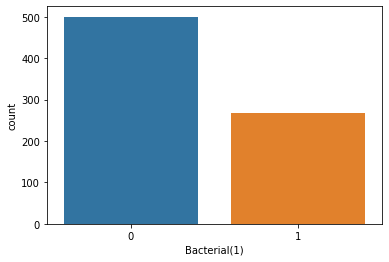

In [31]:
#plot the distribution of the Bacterial and viral meningitis
sns.countplot(x = 'Bacterial(1)', data = int_columns)
#shows that high ppercentage of people are likely to suffer from viral menengitis

In [42]:
#create the test and train data
feature_columns = ['WhiteCells(5-10,000)', 'Glucose(50-80)', 'Neutrophiles(65)','TotalProtein(15-45)', 'BMI', 'lymphocytes(35)', 'Age']
predicted_class = ['Bacterial(1)']

In [75]:
X = mng_dataframe[feature_columns].values
Y = mng_dataframe[predicted_class].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3, random_state=101)

In [83]:
#imputation function works on the strategy of mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#replace the null values with mean
fill_values = imputer


In [82]:
#fit and transform the x_ train and x_test data 
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [78]:
#build the model with random forest classifier
#Random Forest Classifier creates a set of decision trees from randomly selected subset of training set
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200)

#training the model
model.fit(X_train,Y_train)

<ipython-input-78-9234927201db>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=200)

In [79]:
#predict() function to see the predictions
#0 is the prediction that the person is likely to have viral menengitis and 1 is the prediction that the person is likely to have bacterial meningitis
predictions = model.predict(X_test)

from sklearn import metrics
print("Accuracy_Score = ", format(metrics.accuracy_score(Y_test, predictions)))

Accuracy_Score =  1.0


In [80]:
#make real life predictions
x_demo=[[18000, 45, 70, 45,60, 36,50]]
if model.predict(x_demo)==1:
    print("Person is likely to have Bacterial Meningitis")
else:
    print("Person is likely to have Viral meningitis")

Person is likely to have Bacterial Meningitis


In [81]:
#make real life predictions
x_demo=[[10000, 70, 45, 70, 45,50,35]]
if model.predict(x_demo)==1:
    print("Person is likely to have Bacterial Meningitis")
else:
    print("Person is likely to have Viral meningitis")

Person is likely to have Viral meningitis
